# Generator

In [1]:
%matplotlib inline
import numpy as np
import os
import image_tools as imt
from utils import remove_dir, make_dir
from augmentator import Augmentator
from timeit import default_timer as timer
from tqdm import tqdm

In [2]:
src = "/netforge/datasets/private/roman/coins/2017-11-29/images/"
dst = "/netforge/datasets/private/roman/coins/2017-11-29/dataset/uint8/"

In [3]:
def uint8_to_float32(images):
    return images.astype('float32')/256

In [ ]:
%%time
image_shape = [128,128,1]
h,w,c = image_shape

remove_dir(dst)
make_dir(dst)
aug      = Augmentator()
ethalons = imt.load(src, 6000)
ethalons = imt.resize(ethalons, [h,w,3])

# =========================================================
start = timer()
fnum = len(ethalons)
anum = 500
augmented = np.zeros([anum*fnum, h, w, 1], dtype='uint8')
for i in tqdm(range(anum)):
    res = aug.augment(ethalons)
    res = np.mean(res, axis=3, keepdims=True)
    augmented[i*fnum:i*fnum+fnum] = res
t = timer() - start
print("Performance: %.1f ips" % (len(augmented)/t))
# =========================================================

# todo: save info to obtail similar coins
np.save(os.path.join(dst, 'augmented.npy'), augmented)
print("augmented:", augmented.dtype, augmented.shape, augmented.nbytes/1024/1024, "MB")
print("-"*50)

  0%|          | 2/500 [01:04<4:29:23, 32.46s/it]

In [5]:
%%time
try:
    del augmented
except:
    pass
augmented = np.load(os.path.join(dst, 'augmented.npy'))
augmented = uint8_to_float32(augmented)
print("augmented:", augmented.dtype, augmented.shape, augmented.nbytes/1024/1024, "MB")

augmented: float32 (30000, 128, 128, 1) 1875.0 MB
CPU times: user 688 ms, sys: 440 ms, total: 1.13 s
Wall time: 1.12 s


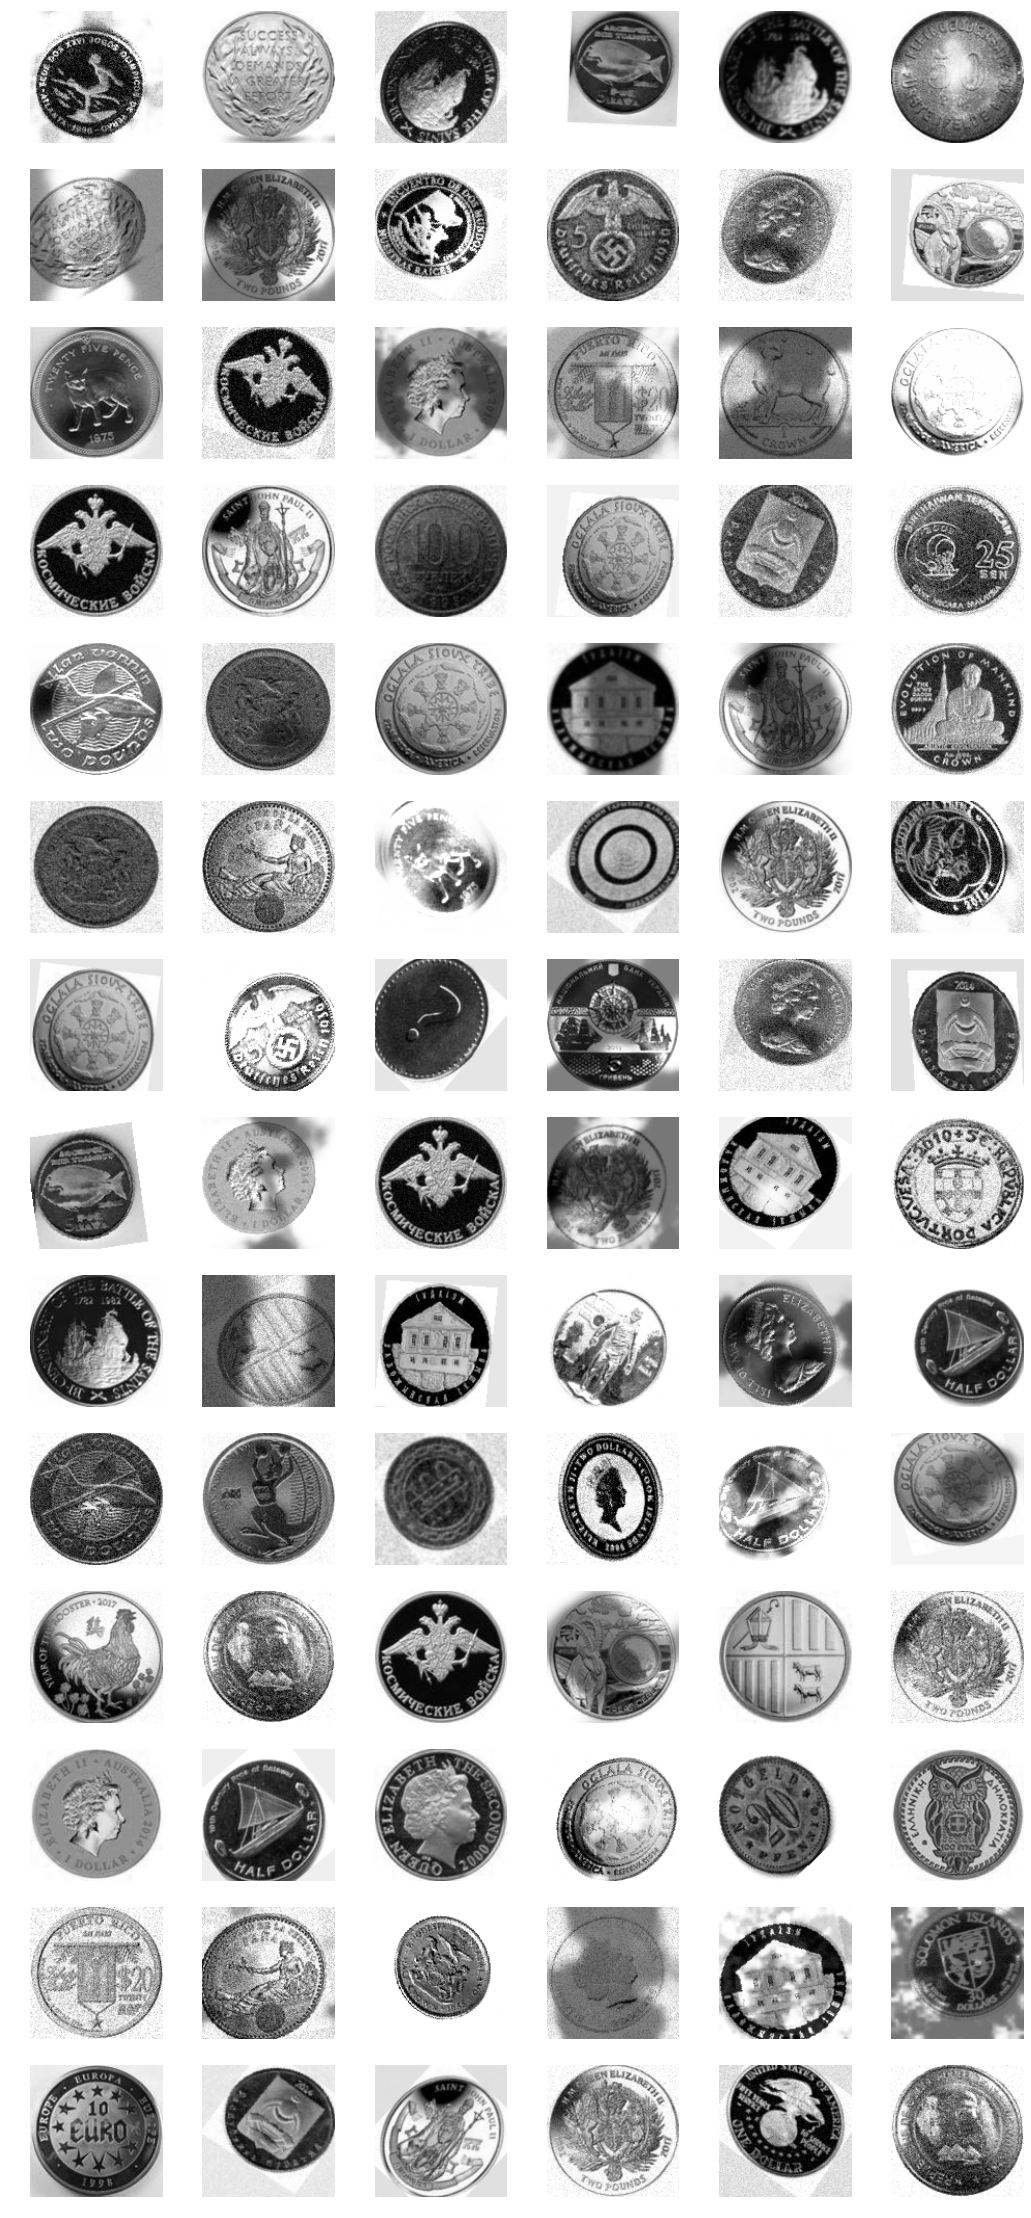

In [6]:
images = imt.choice(augmented, 84)
imt.plot(images, 6)